In [ ]:
!apt install -y ffmpeg
!pip install eyed3
!pip install pydub
!pip install --upgrade pyAudioAnalysis

import os
import tensorflow as tf
import numpy as np
import pandas as pd
from pyAudioAnalysis import audioBasicIO
import matplotlib.pyplot as plt

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 246.1/246.1 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.0/239.0 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 MB 18.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyAudioAnalysis: filename=pyAudioAnalysis-0.3.14-py3-none-any.whl size=41264372 sha256=33f013b4dc8f2c016bcdf6e6f895f1504048e6841ce92cb0f9734729a970eb57
  Stored in directory: /root/.cache/pip/wheels/a7/54/73/fa830689c2440d2c81ff175c60e374930ad1607a8881e0f43f
Successfully built pyAudioAnalysis


In [ ]:
def preProcess(fileName):
    from pyAudioAnalysis.audioBasicIO import read_audio_file
    # Extracting wav file data
    [Fs, x] = read_audio_file(fileName)

    # If double-channel data, take the mean
    if x.ndim > 1:
        x = x.mean(axis=1)

    # Return sample rate and audio signal
    return Fs, x

In [ ]:
def getChromagram(audioData):
    # Inspect array dimensions
    if audioData.ndim == 2 and audioData.shape[1] > 21:
        temp_data = audioData[:, 21]  # Extract column 21 if it's a 2D array
        temp_data = temp_data.reshape(1, temp_data.shape[0])  # Reshape for chromagram
        chromagram = temp_data
    else:
        print(f"audioData does not have sufficient columns. Shape: {audioData.shape}")
        # Return a default chromagram if index 21 is invalid
        chromagram = np.zeros((12, 25))  # Adjust dimensions as needed
    return chromagram

In [ ]:
def getNoteFrequency( chromagram ):

    # Total number of time frames in the current sample
    numberOfWindows = chromagram.shape[1]

    # Taking the note with the highest amplitude
    freqVal = chromagram.argmax( axis = 0 )

    # Converting the freqVal vs time to freq count
    histogram, bin = np.histogram( freqVal, bins = 12 )

    # Normalizing the distribution by the number of time frames
    normalized_hist = histogram.reshape( 1, 12 ).astype( float ) / numberOfWindows

    return normalized_hist

In [ ]:
def plotHeatmap(chromagram, smallSample=True):
    if chromagram is None or chromagram.size == 0:
        print("Chromagram is invalid or empty. Cannot plot heatmap.")
        return

    fig, axis = plt.subplots()
    if smallSample:
        im = axis.imshow(chromagram[:, :25], cmap="YlGn")  # Safely slice the array
    else:
        im = axis.imshow(chromagram)
    plt.colorbar(im)
    plt.show()

In [ ]:
def noteFrequencyPlot( noteFrequency, smallSample = True ):

    fig, axis = plt.subplots(1, 1, sharey=True )

    axis.plot( np.arange( 1, 13 ), noteFrequency[0, :] )

    _ = plt.show()

In [ ]:
feature_name, features = preProcess( "Juno.mp3" )

In [ ]:
def inspectAudioData(audioData):
    print("Type of audioData:", type(audioData))
    print("Length of audioData:", len(audioData) if isinstance(audioData, (list, tuple)) else "N/A")
    if isinstance(audioData, (list, tuple)):
        for i, item in enumerate(audioData):
            print(f"Index {i}: Type {type(item)}, Shape: {getattr(item, 'shape', 'N/A')}")
    else:
        print("audioData is not a list or tuple.")

Type of audioData: <class 'numpy.ndarray'>
Length of audioData: N/A
audioData is not a list or tuple.
audioData does not have sufficient columns. Shape: (979200,)


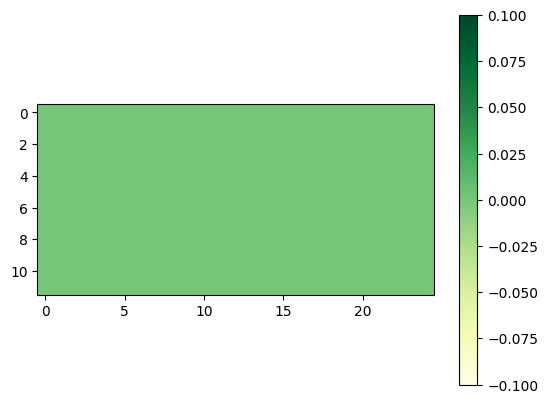

In [ ]:
inspectAudioData(features)
chromagram = getChromagram( features )
plotHeatmap( chromagram )

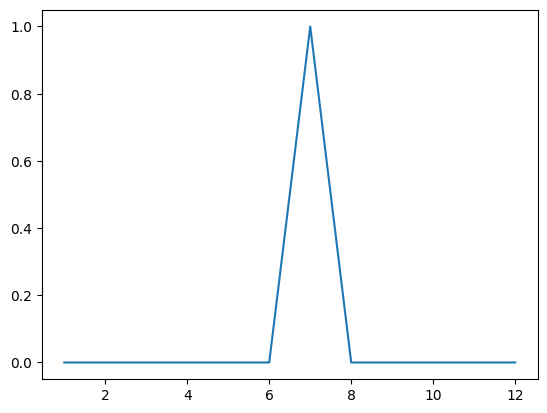

In [ ]:
noteFrequency = getNoteFrequency( chromagram )
noteFrequencyPlot( noteFrequency )